In [1]:
import os
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
df=pd.read_csv('albumlist.csv',encoding='latin8')

In [3]:
df.head(15)

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock"
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave"
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock,"Rock & Roll, Pop Rock, Psychedelic Rock, Exper..."


In [4]:
df.Genre.value_counts()[0]

249

In [5]:
split_genre = []
for s in  df["Genre"]:
    split_genre.append(s.split(",")[0]) # Split every genre field entry at the comma
df["Genre"] = split_genre  
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,Rock,Pop Rock


In [6]:
#  Adding decades column
newyears = []
for year in df["Year"]:
    if year < 1960:
        newyears.append("50s")
    elif year < 1970:
        newyears.append("60s")
    elif year < 1980:
        newyears.append("70s")
    elif year < 1990:
        newyears.append("80s")
    elif year < 2000:
        newyears.append("90s")
    elif year < 2010:
        newyears.append("00s")
    else:
        newyears.append("10s")
df["Decade"] = newyears
sorter = ["50s", "60s", "70s", "80s", "90s", "00s", "10s"]
df["Decade"] = pd.Categorical(df["Decade"], sorter)
df = df.sort_values("Decade")
df.head()

,Number,Year,Album,Artist,Genre,Subgenre,Decade
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues,50s
100,101,1955,In the Wee Small Hours,Frank Sinatra,Jazz,"Big Band, Ballad",50s
307,308,1956,Songs for Swingin' Lovers!,Frank Sinatra,Jazz,"Vocal, Easy Listening",50s
264,265,1959,The Genius of Ray Charles,Ray Charles,Jazz,"Soul-Jazz, Big Band",50s
49,50,1957,Here's Little Richard,Little Richard,Rock,"Rock & Roll, Rhythm & Blues",50s


In [7]:
df.loc[df['Decade']=='70s'].sort_values('Number')

,Number,Year,Album,Artist,Genre,Subgenre,Decade
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul,70s
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock",70s
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave",70s
10,11,1976,The Sun Sessions,Elvis Presley,Rock,Rock & Roll,70s
15,16,1975,Blood on the Tracks,Bob Dylan,Rock,"Folk Rock, Acoustic, Ballad",70s
17,18,1975,Born to Run,Bruce Springsteen,Rock,Pop Rock,70s
22,23,1970,John Lennon/Plastic Ono Band,John Lennon / Plastic Ono Band,Rock,Pop Rock,70s
23,24,1973,Innervisions,Stevie Wonder,Funk / Soul,Soul,70s
25,26,1977,Rumours,Fleetwood Mac,Rock,Pop Rock,70s
27,28,1971,Who's Next,The Who,Rock,"Hard Rock, Mod, Prog Rock, Psychedelic Rock",70s


In [8]:
old_bin=[]
new_bin=[]
df.shape

(500, 7)

In [9]:
df.loc[df['Decade'] == '60s'].count()


Number      105
Year        105
Album       105
Artist      105
Genre       105
Subgenre    105
Decade      105
dtype: int64

In [10]:
df.loc[df['Decade'] == '70s'].count()


Number      186
Year        186
Album       186
Artist      186
Genre       186
Subgenre    186
Decade      186
dtype: int64

In [11]:
df.loc[df['Decade'] == '80s'].count()

Number      85
Year        85
Album       85
Artist      85
Genre       85
Subgenre    85
Decade      85
dtype: int64

In [12]:
df.loc[df['Decade'] == '90s'].count()

Number      72
Year        72
Album       72
Artist      72
Genre       72
Subgenre    72
Decade      72
dtype: int64

In [13]:
df.loc[df['Decade'] == '10s'].count()

Number      2
Year        2
Album       2
Artist      2
Genre       2
Subgenre    2
Decade      2
dtype: int64

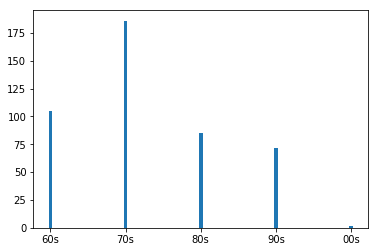

In [17]:
y=[105,186,85,72,2]
x=[20,40,60,80,100]
tick_label=['60s','70s','80s','90s','00s']
plt.bar(x, y, tick_label = tick_label, 
        width = 1) 
plt.show()

In [ ]:
# just by this graph we can see the the majority of top albums of all time were made in 70s an closely followed
#by 60s . after that the quality has been on the decline ever since . with albums in 2000s almost in negligible number